# Non-Linear Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.datasets import make_circles

In [3]:
X , y = make_circles(n_samples=500 , noise = 0.01)

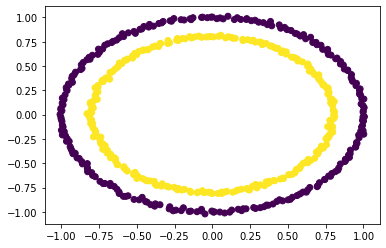

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
def dim(X):
  X1 = X[:,0]
  X2 = X[:,1]
  X3 = X1**2 + X2**2 # Custom kernel

  X_ = np.zeros((X.shape[0],3))
  X_[:,:-1] = X
  X_[:,-1] = X3

  return X_

In [6]:
X_ = dim(X)

In [7]:
X_.shape

(500, 3)

In [8]:
X_[:2,:]

array([[-0.28562726, -0.96915683,  1.02084789],
       [-0.67110355,  0.43272087,  0.63762733]])

In [9]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

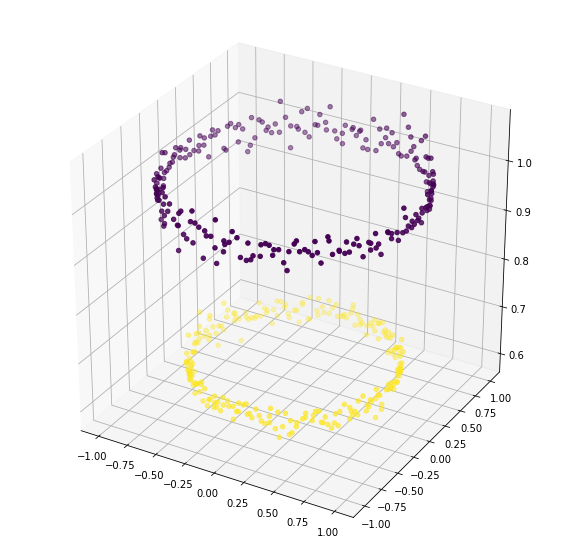

In [10]:
ax = plot3d(X_, True) # 3D plot

# Logistic Classiffier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
model = LogisticRegression()

In [13]:
# not great performance when 2 features
acc = cross_val_score(model,X,y,cv=5).mean()
print(f" The accuracy is : {acc} ")

 The accuracy is : 0.4699999999999999 


# For Higher Dimensions

In [14]:
# high accuracy for higher number of features
acc = cross_val_score(model,X_,y,cv=5).mean()
print(f" The accuracy is : {acc} ")

 The accuracy is : 1.0 


# Visualising Decision Surface


In [15]:
model.fit(X_,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
wts = model.coef_
bias = model.intercept_
wts , bias

(array([[  0.01467222,   0.02501822, -10.94264484]]), array([8.98338864]))

In [17]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [18]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81369796 0.81503879 0.81637962 0.81772045]
 [0.81598426 0.81732509 0.81866592 0.82000675]
 [0.81827057 0.8196114  0.82095223 0.82229306]
 [0.82055687 0.8218977  0.82323853 0.82457936]]


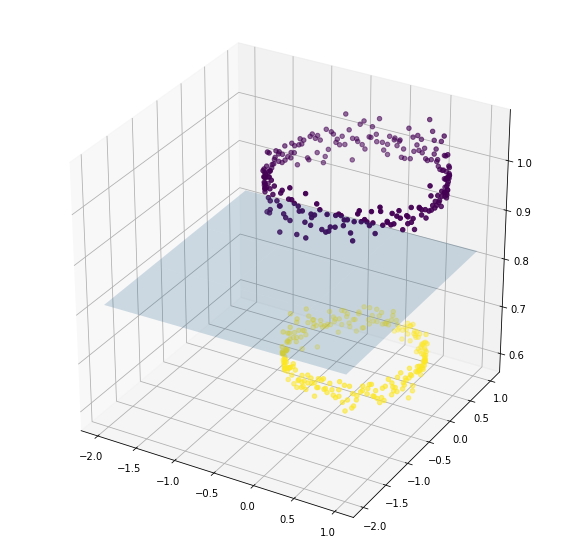

In [19]:
ax = plot3d(X_, False)
ax.plot_surface(xx,yy,z,alpha = 0.2)
plt.show()